In [1]:
#This notebook was created by Prisha Jain

In [2]:
#opening the .fits file
from astropy.io import fits
dat = fits.open(r"C:\Users\prish\Downloads\emm_emu_l2b_20210220t114444_0005_os1_sw1of2_f_v01-30.fits.gz")

In [3]:
#displaying info about the various headers present in the file
dat.info()

Filename: C:\Users\prish\Downloads\emm_emu_l2b_20210220t114444_0005_os1_sw1of2_f_v01-30.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      42   ()      
  1  CONFIG        1 BinTableHDU    131   1R x 35C   [I, J, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, I, B, B, B, B, I, E, B, I, I, I, 8A, 3A, 4A, 4A]   
  2  HK            1 BinTableHDU     30   107R x 7C   [E, E, E, E, E, E, E]   
  3  STIMS         1 BinTableHDU     62   107R x 16C   [I, E, E, E, E, E, E, E, E, E, E, 32B, 32B, 32B, 32B, J]   
  4  TIME          1 BinTableHDU     16   107R x 2C   [D, 23A]   
  5  DET           1 BinTableHDU     30   107R x 5C   [32768E, J, J, J, 256J]   
  6  WAVELENGTH    1 BinTableHDU     20   1R x 3C   [32768E, 128E, 128B]   
  7  CAL           1 BinTableHDU     42   107R x 8C   [32768E, 32768E, 32768E, 32768E, 32768E, 32768E, 32768E, E]   
  8  SC_GEOM       1 BinTableHDU    103   107R x 27C   [D, D, D, D, D, 3D, 3D, 3D, 3D, 3D, 

In [4]:
#displaying info about the data contained in a particular header
dat['SC_GEOM'].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  568 / length of dimension 1                          
NAXIS2  =                  107 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   27 / number of table fields                         
EXTNAME = 'SC_GEOM '           / extension name                                 
TTYPE1  = 'SUB_SC_LAT'         / Planetographic Latitude of subspacecraft point 
TFORM1  = 'D       '           / data type for SUB_SC_LAT: float64              
TUNIT1  = 'deg     '           / units for SUB_SC_LAT: [deg]                    
TTYPE2  = 'SUB_SC_LON'      

In [5]:
# The shape of the ‘CORRECTED_CNTS’ element corresponds to (number of integrations in this file x number of spatial bins on the detector x number of spectral bins on the detector)
dat['CAL'].data['CORRECTED_CNTS'].shape

(107, 128, 256)

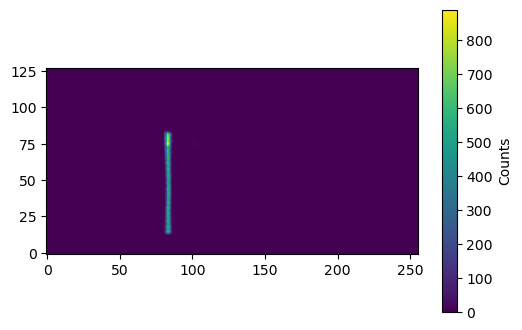

In [6]:
# spectrum produced by EMUS:
test_int = dat['CAL'].data['CORRECTED_CNTS'].shape[0]//2
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(dat['CAL'].data['CORRECTED_CNTS'][test_int], origin='lower')
cbar = plt.colorbar(img)
cbar.set_label('Counts')

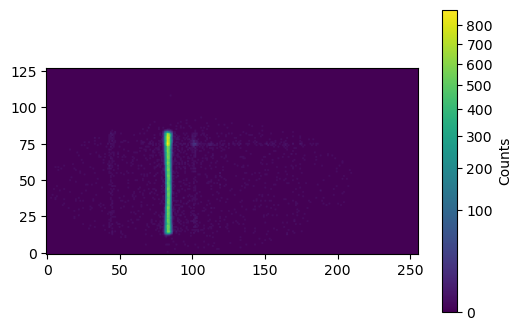

In [7]:
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(dat['CAL'].data['CORRECTED_CNTS'][test_int], origin='lower',
norm=mpl.colors.PowerNorm(0.5))
cbar = plt.colorbar(img)
cbar.set_label('Counts')

In [8]:
#selecting one spatial row to examine the spectra produced
test_spa = 45

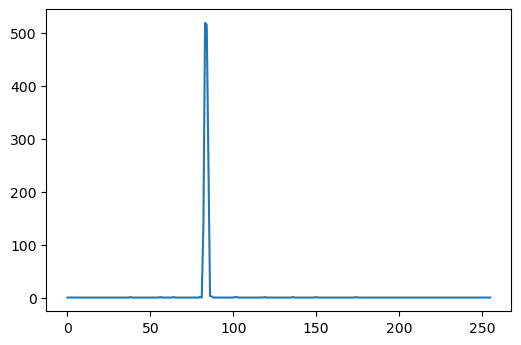

In [9]:
fig, ax = plt.subplots(1, dpi=100)
plt.plot(dat['CAL'].data['CORRECTED_CNTS'][test_int, test_spa])

(0.0, 20.0)

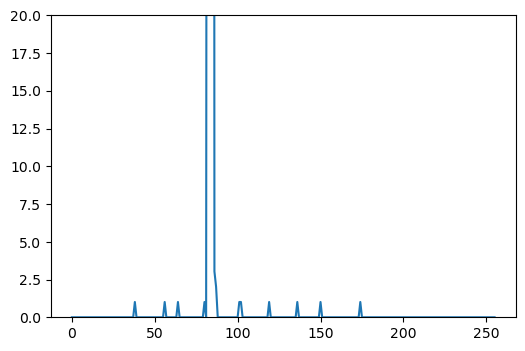

In [10]:
#zooming in or using different scales to enlarge data and observe small peaks as well
fig, ax = plt.subplots(1, dpi=100)
plt.plot(dat['CAL'].data['CORRECTED_CNTS'][test_int, test_spa])
plt.ylim(0,20)

In [11]:
#making signal to noise ratio better
import numpy as np
test_average_spectrum_counts = np.nanmean(np.reshape(dat['CAL'].data['CORRECTED_CNTS'],(-1, dat['CAL'].data['CORRECTED_CNTS'].shape[-1])),axis=0)

(0.0, 5.0)

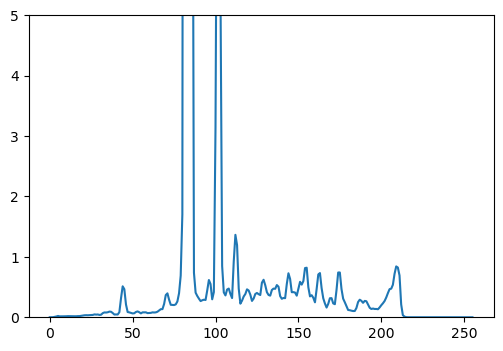

In [12]:
fig, ax = plt.subplots(1, dpi=100)
plt.plot(test_average_spectrum_counts)
plt.ylim(0,5)

In [13]:
dat['WAVELENGTH'].data['WAVELENGTH_L2A'].shape

(1, 128, 256)

In [14]:
test_average_spectrum_radiance = np.nanmean(np.reshape(dat['CAL'].data['RADIANCE'],(-1, dat['CAL'].data['RADIANCE'].shape[-1])),axis=0)

Text(0, 0.5, 'Average Radiance [R/nm]')

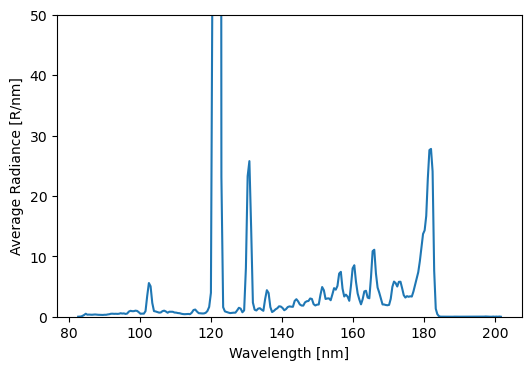

In [15]:
test_average_wavelengths = np.nanmean(np.reshape(dat['WAVELENGTH'].data['WAVELENGTH_L2A'],(-1, dat['WAVELENGTH'].data['WAVELENGTH_L2A'].shape[-1])),axis=0)
fig, ax = plt.subplots(1, dpi=100)
plt.plot(test_average_wavelengths, test_average_spectrum_radiance)
plt.ylim(0,50)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Average Radiance [R/nm]')

In [16]:
def integrate_brightness(wavelength, radiance, line_range):
# figure out which spectral bins are in the wavelength range
    spectral_pos = np.logical_and(line_range[0] < wavelength, wavelength <line_range[1])
    spectral_pos = np.where(spectral_pos)
# figure our how wide the spectral bins are
    wavelength_diff = np.diff(wavelength)
# figure out the contribution in R from each spectral bin and add it up
    return np.nansum(radiance[spectral_pos]*wavelength_diff[spectral_pos]) # R/nm * nm = R

In [17]:
integrate_brightness(dat['WAVELENGTH'].data['WAVELENGTH_L2A'][0, test_spa],dat['CAL'].data['RADIANCE'][test_int, test_spa],[121.56-2.0,121.56+2.0])

1575.4324

In [18]:
test_observation_image = np.zeros(dat['CAL'].data['RADIANCE'].shape[:2])
for i_int in range(dat['CAL'].data['RADIANCE'].shape[0]):
    for i_spa in range(dat['CAL'].data['RADIANCE'].shape[1]):
        test_observation_image[i_int, i_spa] =integrate_brightness(dat['WAVELENGTH'].data['WAVELENGTH_L2A'][0, i_spa],dat['CAL'].data['RADIANCE'][i_int, i_spa],[121.56-2.0,121.56+2.0])

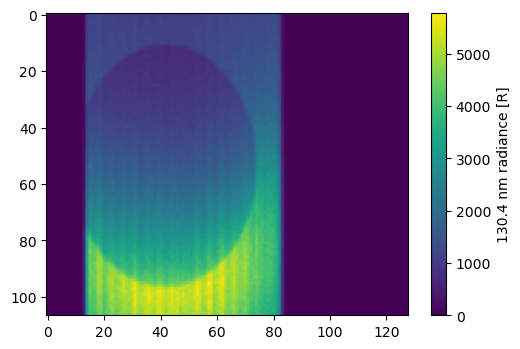

In [19]:
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(test_observation_image)
cbar = plt.colorbar(img)
cbar.set_label('130.4 nm radiance [R]')

In [20]:
dat['EMISS'].data['NAME']

chararray(['Ar I 104.8 singlet', 'Ar I 106.6 singlet',
           'H I 102.6 singlet / O I 102.7 multiplet', 'O I 104.0 triplet',
           'O I 115.2 singlet', 'CO (C-X) Hopfield-Birge bands',
           'CO (B-X) Hopfield-Birge bands', 'C I 127.7 multiplet',
           'C I 132.9 multiplet', 'C I 156.1 multiplet',
           'C I 160.3 multiplet', 'C I 165.7 multiplet',
           'C II 133.5 multiplet', 'C II 152.9 multiplet',
           'H I 121.6 singlet', 'N I 120.0 triplet',
           'N I 149.3 multiplet', 'O I 130.4 triplet',
           'O I 135.6 doublet', 'N2 (a-X) Lyman-Birge-Hopfield bands',
           'CO 4PG Solar Fluorescent scattering', 'CO 4PG vv CO2 + e',
           'CO 4PG vv0 CO2 + e', 'CO 4PG vv CO + e', 'CO 4PG vv0 CO + e',
           'CO 4PG Si IV 1394', 'CO 4PG C IV 1548', 'CO 4PG O I 1304',
           'CO 4PG H I 1216'], dtype='<U39')

In [21]:
#plotting the Radiance data contained in the EMISS header

In [22]:
dat['EMISS'].data['RADIANCE'].shape
emission_index = np.where([('121.6' in el) for el in dat['EMISS'].data['NAME']])[0][0]
emission_index

14

In [23]:
emission_radiance = dat['EMISS'].data['RADIANCE'][emission_index]

In [24]:
emission_radiance.shape

(128, 107)

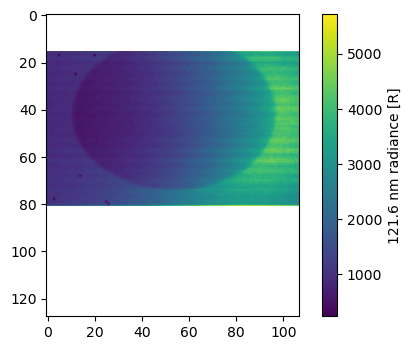

In [25]:
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(emission_radiance)
cbar = plt.colorbar(img)
cbar.set_label('121.6 nm radiance [R]')

In [26]:
#plotting the solar zenith angle data

In [27]:
dat['FOV_GEOM'].data['SOLAR_Z_ANGLE'].shape

(107, 5, 128)

In [28]:
observation_sza = dat['FOV_GEOM'].data['SOLAR_Z_ANGLE'][:,0]

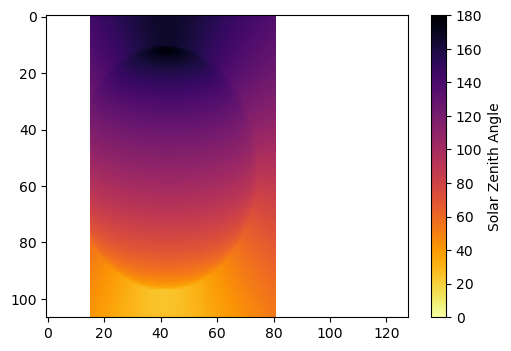

In [29]:
import idl_colorbars
fig, ax = plt.subplots(1, dpi=100)
img = ax.imshow(observation_sza,cmap=idl_colorbars.getcmap('78', reverse=True),norm=mpl.colors.Normalize(vmin=0, vmax=180))

cbar = plt.colorbar(img)
cbar.set_label('Solar Zenith Angle')